# **Análise com GeoPandas: Municípios x Unidades de Conservação**

## Instalando GeoPandas

In [4]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.2 MB/s 
     |████████████████████████████████| 16.7 MB 74.8 MB/s 
     |████████████████████████████████| 6.3 MB 23.8 MB/s 


## Importando as Bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import seaborn as sns

## Mounting Google Drive

In [6]:
# Load the Drive helper and mount
from google.colab import drive 

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


## Carregando os Dados

In [ ]:
#data_ibge = gpd.read_file( 'data_ibge/BR_Municipios_2021.shp' )
#data_icmbio = gpd.read_file( 'data_icmbio/UCsFedAgo2022.shp' )

In [7]:
data_ibge = gpd.read_file( '/content/drive/MyDrive/repos/_Desafios_Tecnicos/2022-09-01_Geopandas/data_ibge/BR_Municipios_2021.shp' )
data_icmbio = gpd.read_file( '/content/drive/MyDrive/repos/_Desafios_Tecnicos/2022-09-01_Geopandas/data_icmbio/UCsFedAgo2022.shp' )

# Descrição dos Dados

## Visão Geral dos Dados: IBGE

In [ ]:
data_ibge.head(5)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,AREA_MUN,REGIAO_MUN
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",0.587657,Norte
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",0.364965,Norte
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",0.109724,Norte
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",0.314085,Norte
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",0.232089,Norte


In [ ]:
data_ibge.tail(5)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."
5571,5300108,Brasília,DF,5760.784,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5..."


In [ ]:
data_ibge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    5572 non-null   object  
 1   NM_MUN    5572 non-null   object  
 2   SIGLA     5572 non-null   object  
 3   AREA_KM2  5572 non-null   float64 
 4   geometry  5572 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 217.8+ KB


In [ ]:
data_ibge.duplicated().unique()

array([False])

### Agrupando Estados por Região

In [8]:
regiao = {
    "Norte":['AM', 'PA', 'RR', 'AC', 'RO', 'AP', 'TO'],
    "Sul":['PR', 'SC', 'RS'],
    "Centro-Oeste":['MT', 'MS', 'GO', 'DF'],
    "Nordeste":['BA', 'CE','MA', 'PB', 'PE', 'RN', 'SE', 'AL', 'PI'],
    "Sudeste":['SP', 'RJ', 'MG','ES'],
}
 
for k in regiao:
    data_ibge.loc[ data_ibge['SIGLA'].isin(regiao[k]), 'REGIAO_MUN'] = k

### Total de Municípios por Região

In [ ]:
data_ibge.REGIAO_MUN.value_counts()

Nordeste        1794
Sudeste         1668
Sul             1193
Centro Oeste     467
Norte            450
Name: REGIAO_MUN, dtype: int64

### Calculando as Áreas dos Municípios

In [9]:
data_ibge['AREA_MUN'] = 0.0
for index, row in data_ibge.iterrows():
  polygon_mun = data_ibge.iloc[index].geometry
  data_ibge.loc[index, 'AREA_MUN'] = polygon_mun.area

In [ ]:
total_area_mun_reg = data_ibge.groupby(['REGIAO_MUN'])['AREA_MUN'].sum().sort_values(ascending=False)
total_area_mun_reg

REGIAO_MUN
Norte           314.583135
Centro-Oeste    135.436851
Nordeste        127.751925
Sudeste          79.747299
Sul              52.788282
Name: AREA_MUN, dtype: float64

In [ ]:
total_area_mun = data_ibge['AREA_MUN'].sum()
print(total_area_mun)

710.3074917490643


### Plotando Gráficos Municípios

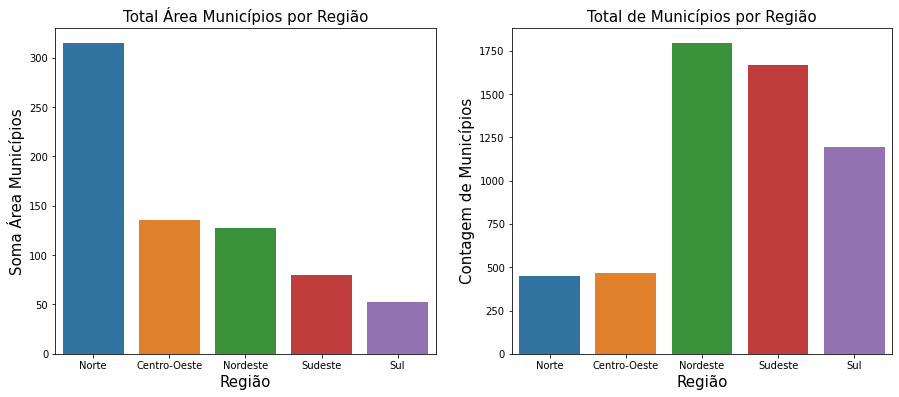

In [44]:
plt.subplots(figsize=(15,6))

plt.subplot( 1, 2, 1 )
ax = sns.barplot(x = 'REGIAO_MUN',
                   y='AREA_MUN',
                   data = data_ibge,
                   estimator=sum,
                   ci=None,
                   order=['Norte','Centro-Oeste','Nordeste','Sudeste','Sul'])

plt.title("Total Área Municípios por Região", size=15)
plt.xlabel("Região", size=15)
plt.ylabel("Soma Área Municípios", size=15)

plt.subplot( 1, 2, 2 )
ax = sns.countplot(x = 'REGIAO_MUN',
              data = data_ibge,
              order=['Norte','Centro-Oeste','Nordeste','Sudeste','Sul'])

plt.title("Total de Municípios por Região", size=15)
plt.xlabel("Região", size=15)
plt.ylabel("Contagem de Municípios", size=15)

plt.show();

## Visão Geral dos Dados: ICMBio

In [ ]:
data_icmbio.head(1)

,NomeUC,Cnuc,CriacaoAno,AreaHaAlb,PerimM,CriacaoAto,EsferaAdm,SiglaCateg,GrupoUC,UFAbrang,MunAbrang,BiomaIBGE,BiomaCRL,GRegional,FusoAbrang,Demarcacao,EscalaUC,NGI,geometry
0,RESERVA BIOLÓGICA DE POÇO DAS ANTAS,0000.00.0215,1974,5052.533516,38474.3438,DEC 73.791 de 11/03/1974; DEC 76.534 de 13/1...,Federal,REBIO,PI,RJ,"Silva Jardim, Casimiro de Abreu.",MATA ATLÂNTICA,MATA ATLÂNTICA,GR4,23S,Dado não disponível,Dado não disponível,ICMBio Mico-Leão-Dourado,"POLYGON ((-42.26621 -22.49977, -42.26611 -22.4..."


In [ ]:
data_icmbio.tail(1)

,NomeUC,Cnuc,CriacaoAno,AreaHaAlb,PerimM,CriacaoAto,EsferaAdm,SiglaCateg,GrupoUC,UFAbrang,MunAbrang,BiomaIBGE,BiomaCRL,GRegional,FusoAbrang,Demarcacao,EscalaUC,NGI,geometry
333,PARQUE NACIONAL DE BOA NOVA,0000.00.1908,2010,12294.664199,135723.3329,"DEC S/N, de 11/06/2010",Federal,PARNA,PI,BA,"Boa Nova, Manoel Vitorino, Dário Meira.",MATA ATLÂNTICA,MATA ATLÂNTICA,GR2,24S,Dado não disponível,Dado não disponível,ICMBio Sudoeste Baiano,"MULTIPOLYGON (((-40.06617 -14.46432, -40.06596..."


In [ ]:
data_icmbio.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NomeUC      334 non-null    object  
 1   Cnuc        334 non-null    object  
 2   CriacaoAno  334 non-null    object  
 3   AreaHaAlb   334 non-null    float64 
 4   PerimM      334 non-null    float64 
 5   CriacaoAto  334 non-null    object  
 6   EsferaAdm   334 non-null    object  
 7   SiglaCateg  334 non-null    object  
 8   GrupoUC     334 non-null    object  
 9   UFAbrang    334 non-null    object  
 10  MunAbrang   334 non-null    object  
 11  BiomaIBGE   334 non-null    object  
 12  BiomaCRL    334 non-null    object  
 13  GRegional   334 non-null    object  
 14  FusoAbrang  334 non-null    object  
 15  Demarcacao  334 non-null    object  
 16  EscalaUC    334 non-null    object  
 17  NGI         333 non-null    object  
 18  geometry    334 non-null    geometry
dtype

In [ ]:
data_icmbio.duplicated().unique()

array([False])

### Agrupando Unidades de Conservação por região

In [10]:
data_icmbio['UFAbrang'].unique()

array(['RJ', 'SP', 'PR', 'SC', 'RS', 'PA/AP', 'AM', 'RR', 'PA', 'CE',
       'TO', 'ES/MG', 'SP/PR', 'AM/RR', 'AP', 'MA', 'PE', 'PI', 'RN',
       'AL', 'BA', 'RO', 'MG', 'PB', 'GO', 'ES', 'AC', 'PI/CE/PE',
       'MT/GO', 'BA/GO', 'DF', 'SP/PR/MS', 'RJ/SP', 'MA/PI', 'PB/PE',
       'BA/MG', 'AC/AM', 'PR/SC', 'BA/SE/AL', 'MG/RJ/SP', 'PI/CE',
       'BA/TO', 'MT', 'SE', 'RO/MT/AM', 'SC/RS', 'MG/RJ', 'GO/DF',
       'MS/MT', 'PE/AL', 'AM/MT', 'MS/GO', 'MS', 'MA/PI/BA', 'MS/PR',
       'PA/AM', 'MA/PI/CE', 'RO/AM', 'AM/RO', 'AM/PA'], dtype=object)

In [46]:
regiao = {
    "Norte":['AM', 'PA', 'RR', 'AC', 'RO', 'AP', 'TO', 'PA/AP', 'AM/RR', 'AC/AM', 'RO/MT/AM', 'AM/MT', 'PA/AM', 'RO/AM', 'AM/RO', 'AM/PA'],
    "Sul":['PR', 'SC', 'RS', 'PR/SC', 'SC/RS', 'SP/PR'],
    "Centro-Oeste":['MT', 'MS', 'GO', 'DF', 'MT/GO', 'BA/GO', 'BA/TO', 'GO/DF', 'MS/MT', 'MS/GO', 'MS/PR', 'SP/PR/MS'],
    "Nordeste":['BA', 'CE','MA', 'PB', 'PE', 'RN', 'SE', 'AL', 'PI', 'PI/CE/PE', 'MA/PI', 'PB/PE', 'BA/SE/AL', 'PI/CE', 'PE/AL', 'MA/PI/BA', 'MA/PI/CE'],
    "Sudeste":['SP', 'RJ', 'MG','ES', 'ES/MG', 'RJ/SP', 'BA/MG', 'MG/RJ/SP', 'MG/RJ'],
}
 
for k in regiao:
    data_icmbio.loc[ data_icmbio['UFAbrang'].isin(regiao[k]), 'REGIAO_UC'] = k

### Total de Unidades de Conservação por Região

In [ ]:
data_icmbio.REGIAO_UC.value_counts()

Norte           126
Nordeste         84
Sudeste          62
Sul              39
Centro-Oeste     23
Name: REGIAO_UC, dtype: int64

### Calculando as Áreas das Unidades de Conservação

In [11]:
data_icmbio['AREA_UC'] = 0.0
for index, row in data_icmbio.iterrows():
  polygon_uc = data_icmbio.iloc[index].geometry
  data_icmbio.loc[index, 'AREA_UC'] = polygon_uc.area

In [ ]:
total_area_uc_reg = data_icmbio.groupby(['REGIAO_UC'])['AREA_UC'].sum().sort_values(ascending=False)
total_area_uc_reg

REGIAO_UC
Nordeste        83.247564
Norte           52.469892
Centro-Oeste     3.146666
Sudeste          2.485248
Sul              1.283045
Name: AREA_UC, dtype: float64

In [ ]:
total_area_uc = data_icmbio['AREA_UC'].sum()
print(total_area_uc)

142.63241462522083


### Plotando Gráficos Unidades de Conservação

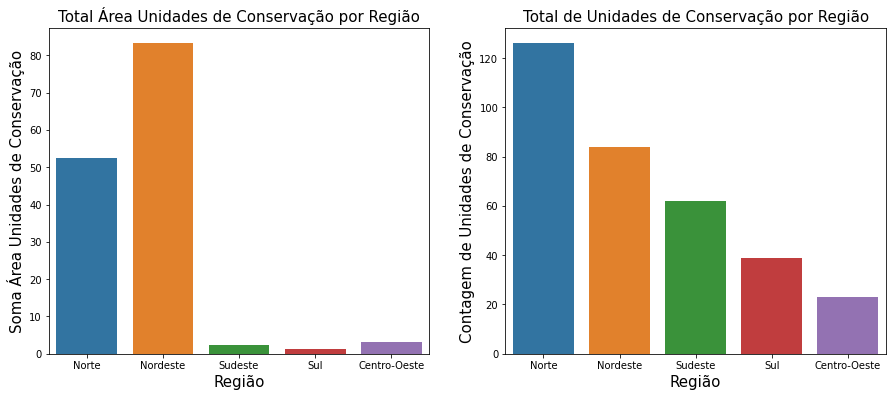

In [51]:
plt.subplots(figsize=(15,6))

plt.subplot( 1, 2, 1 )
ax = sns.barplot(x = 'REGIAO_UC',
                   y='AREA_UC',
                   data = data_icmbio,
                   estimator=sum,
                   ci=None,
                   order=['Norte', 'Nordeste','Sudeste','Sul','Centro-Oeste'])

plt.title("Total Área Unidades de Conservação por Região", size=15)
plt.xlabel("Região", size=15)
plt.ylabel("Soma Área Unidades de Conservação", size=15)


plt.subplot( 1, 2, 2 )
ax = sns.countplot(x = 'REGIAO_UC',
              data = data_icmbio,
              order = data_icmbio['REGIAO_UC'].value_counts().index)

plt.title("Total de Unidades de Conservação por Região", size=15)
plt.xlabel("Região", size=15)
plt.ylabel("Contagem de Unidades de Conservação", size=15)

plt.show();

# Mapa do Brasil e Unidades de Conservação

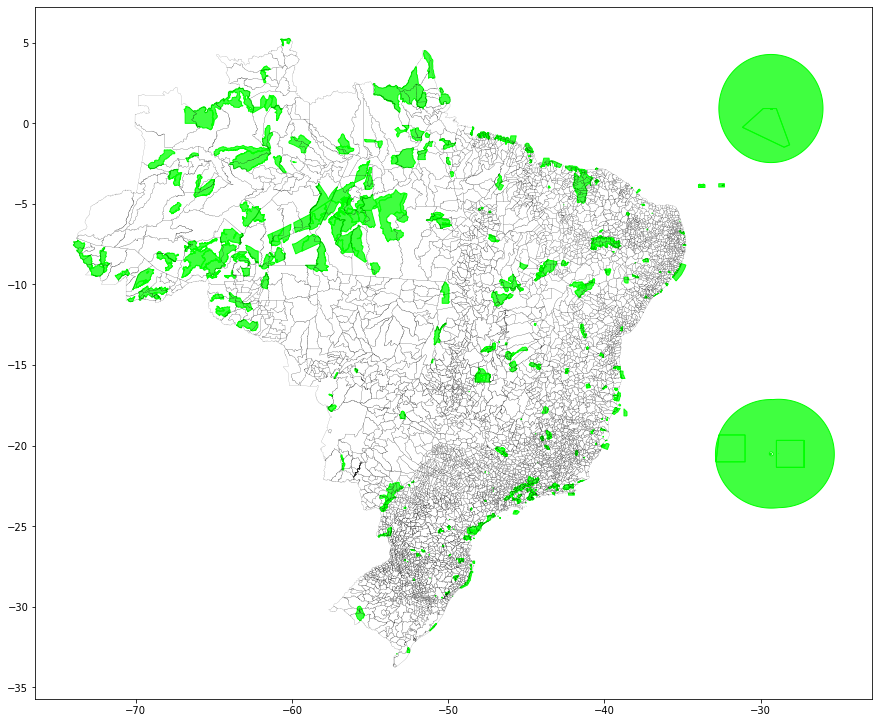

In [26]:
fig, ax = plt.subplots( figsize=( 15,15 ) )
edge_color_opacity = 1 # 0<val<1
face_color_opacity = 0.75 # 0<val<1

data_icmbio.plot( ax=ax,
                 edgecolor=(0, 1, 0, edge_color_opacity),
                 facecolor=(0, 1, 0, face_color_opacity))
data_ibge.plot( ax=ax, facecolor='None', edgecolor='black',
                 lw=0.1 )

# Obtendo Sobreposição: Unidades de Conservação x Municípios

## Criando um GeoDataFrame de Sobreposição

In [ ]:
#data_overlay = gpd.overlay(data_ibge, data_icmbio, how="intersection", make_valid=True)

C:\Users\Leonardo de Freitas\AppData\Local\Temp\ipykernel_16508\2491422238.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 22 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  data_overlay = gpd.overlay(data_ibge, data_icmbio, how="intersection", make_valid=True)


In [ ]:
data_overlay.head(1)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,REGIAO_MUN,AREA_MUN,NomeUC,Cnuc,CriacaoAno,AreaHaAlb,...,BiomaIBGE,BiomaCRL,GRegional,FusoAbrang,Demarcacao,EscalaUC,NGI,REGIAO_UC,AREA_UC,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,Norte,0.587657,RESERVA BIOLÓGICA DO GUAPORÉ,0000.00.0206,1982,615776.329425,...,AMAZÔNIA,AMAZÔNIA,GR1,20S,Dado não disponível,Dado não disponível,ICMBio Cautário-Guaporé,Norte,0.512162,"MULTIPOLYGON (((-62.61700 -12.86469, -62.61677..."


### Salvando o GeoDataFrame de Sobreposição

In [ ]:
#data_overlay.to_file('data_overlay.geojson', driver='GeoJSON')

### Carregando o GeoDataFrame de Sobreposição


In [52]:
#data_overlay = gpd.read_file( 'data_overlay.geojson' )

In [13]:
data_overlay = gpd.read_file( '/content/drive/MyDrive/repos/_Desafios_Tecnicos/2022-09-01_Geopandas/data_overlay.geojson' )

In [ ]:
data_overlay.head(1)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,REGIAO_MUN,AREA_MUN,NomeUC,Cnuc,CriacaoAno,AreaHaAlb,...,BiomaIBGE,BiomaCRL,GRegional,FusoAbrang,Demarcacao,EscalaUC,NGI,REGIAO_UC,AREA_UC,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,Norte,0.587657,RESERVA BIOLÓGICA DO GUAPORÉ,0000.00.0206,1982,615776.329425,...,AMAZÔNIA,AMAZÔNIA,GR1,20S,Dado não disponível,Dado não disponível,ICMBio Cautário-Guaporé,Norte,0.512162,"MULTIPOLYGON (((-62.61700 -12.86469, -62.61677..."


## Calculando as Áreas de Sobreposição

In [14]:
df1 = data_overlay.copy()

df1['AREA_SOBREP'] = 0.0
for index, row in df1.iterrows():
  polygon_over = df1.iloc[index].geometry
  df1.loc[index, 'AREA_SOBREP'] = polygon_over.area

df1.head(1)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,REGIAO_MUN,AREA_MUN,NomeUC,Cnuc,CriacaoAno,AreaHaAlb,...,BiomaCRL,GRegional,FusoAbrang,Demarcacao,EscalaUC,NGI,REGIAO_UC,AREA_UC,geometry,AREA_SOBREP
0,1100015,Alta Floresta D'Oeste,RO,7067.127,Norte,0.587657,RESERVA BIOLÓGICA DO GUAPORÉ,0000.00.0206,1982,615776.329425,...,AMAZÔNIA,GR1,20S,Dado não disponível,Dado não disponível,ICMBio Cautário-Guaporé,Norte,0.512162,"MULTIPOLYGON (((-62.61700 -12.86469, -62.61677...",0.07972


In [ ]:
total_area_sobrep = df1.groupby(['REGIAO_MUN'])['AREA_SOBREP'].sum().reset_index()
total_area_sobrep.sort_values(by='AREA_SOBREP', ascending=False)

,REGIAO_MUN,AREA_SOBREP
2,Norte,51.879316
1,Nordeste,6.134759
0,Centro-Oeste,3.202589
3,Sudeste,2.162304
4,Sul,1.450513


In [ ]:
# Calculando a Área Total de Sobreposição
total_area_over = df1['AREA_SOBREP'].sum()
print(total_area_over)

64.82948077128673


## Selecionando colunas

In [15]:
column_list = [
  'CD_MUN',
 'NM_MUN',
 'SIGLA',
 'REGIAO_MUN',
 'AREA_MUN',
 'Cnuc',
 'NomeUC',
 'REGIAO_UC',
 'AREA_UC',
 'AREA_SOBREP',
 ]

df2 = df1[column_list]
df2.head(1)

,CD_MUN,NM_MUN,SIGLA,REGIAO_MUN,AREA_MUN,Cnuc,NomeUC,REGIAO_UC,AREA_UC,AREA_SOBREP
0,1100015,Alta Floresta D'Oeste,RO,Norte,0.587657,0000.00.0206,RESERVA BIOLÓGICA DO GUAPORÉ,Norte,0.512162,0.07972


## Calculando a Porcentagem de Área de Sobreposição para cada Unidade de Conservação

In [16]:
df3 = df2.copy()
for i in range( len(df3) ):
  df3.loc[i, 'PERC_SOBREP'] = df3.loc[i, 'AREA_SOBREP']/df3.loc[i, 'AREA_MUN']

df3.head(1)

,CD_MUN,NM_MUN,SIGLA,REGIAO_MUN,AREA_MUN,Cnuc,NomeUC,REGIAO_UC,AREA_UC,AREA_SOBREP,PERC_SOBREP
0,1100015,Alta Floresta D'Oeste,RO,Norte,0.587657,0000.00.0206,RESERVA BIOLÓGICA DO GUAPORÉ,Norte,0.512162,0.07972,0.135657


## Totalizando a Porcentagem da Área de Sobreposição por Município

In [17]:
df4 = df3.copy()
df4 = df4.groupby(['CD_MUN'])['PERC_SOBREP'].sum().reset_index()
df4.rename(columns={"CD_MUN":"CD_MUN",
                   "PERC_SOBREP":"PERC_TOTAL"} ,inplace=True)
df4.head(1)

,CD_MUN,PERC_TOTAL
0,1100015,0.135657


## Incluindo a Porcentagem Total

In [18]:
df5 = pd.merge(df3, df4, on='CD_MUN', how='inner')
df5.head(3)

,CD_MUN,NM_MUN,SIGLA,REGIAO_MUN,AREA_MUN,Cnuc,NomeUC,REGIAO_UC,AREA_UC,AREA_SOBREP,PERC_SOBREP,PERC_TOTAL
0,1100015,Alta Floresta D'Oeste,RO,Norte,0.587657,0000.00.0206,RESERVA BIOLÓGICA DO GUAPORÉ,Norte,0.512162,0.079720,0.135657,0.135657
1,1100320,São Miguel do Guaporé,RO,Norte,0.618410,0000.00.0206,RESERVA BIOLÓGICA DO GUAPORÉ,Norte,0.512162,0.000263,0.000425,0.390297
2,1100320,São Miguel do Guaporé,RO,Norte,0.618410,0000.00.0163,PARQUE NACIONAL DE PACAÁS NOVOS,Norte,0.586492,0.241101,0.389872,0.390297


## Renomeando as colunas

In [19]:
df6 = df5.rename({'Cnuc': 'CNUC', 'NomeUC': 'NM_UC'}, axis=1)
df6.head(1)

,CD_MUN,NM_MUN,SIGLA,REGIAO_MUN,AREA_MUN,CNUC,NM_UC,REGIAO_UC,AREA_UC,AREA_SOBREP,PERC_SOBREP,PERC_TOTAL
0,1100015,Alta Floresta D'Oeste,RO,Norte,0.587657,0000.00.0206,RESERVA BIOLÓGICA DO GUAPORÉ,Norte,0.512162,0.07972,0.135657,0.135657


## Salvando o Relatório Final

In [ ]:
#df6.to_csv('report_br.csv', index=False)

## Carregando o Relatório Final

In [20]:
df = pd.read_csv( '/content/drive/MyDrive/repos/_Desafios_Tecnicos/2022-09-01_Geopandas/report_br.csv' )

In [ ]:
df.head(1)

,CD_MUN,NM_MUN,SIGLA,REGIAO_MUN,AREA_MUN,CNUC,NM_UC,REGIAO_UC,AREA_UC,AREA_SOBREP,PERC_SOBREP,PERC_TOTAL
0,1100015,Alta Floresta D'Oeste,RO,Norte,0.587657,0000.00.0206,RESERVA BIOLÓGICA DO GUAPORÉ,Norte,0.512162,0.07972,0.135657,0.135657


# Analisando os Municípios que fazem intersecção com Unidades de Conservação

In [21]:
df_mun_uc = df.groupby(['CD_MUN', 'NM_MUN', 'REGIAO_MUN', 'AREA_MUN'])['AREA_SOBREP'].sum().reset_index()
df_mun_uc.head(1)

,CD_MUN,NM_MUN,REGIAO_MUN,AREA_MUN,AREA_SOBREP
0,1100015,Alta Floresta D'Oeste,Norte,0.587657,0.07972


In [72]:
total_area_mun_uc_reg = df_mun_uc.groupby(['REGIAO_MUN'])['AREA_MUN'].sum().sort_values(ascending=False)
total_area_mun_uc_reg

REGIAO_MUN
Norte           227.891444
Nordeste         31.455449
Centro-Oeste     31.357778
Sudeste          13.179497
Sul               8.987779
Name: AREA_MUN, dtype: float64

In [63]:
total_cont_mun_uc_reg = df_mun_uc.groupby(['REGIAO_MUN'])['AREA_MUN'].count().sort_values(ascending=False)
total_cont_mun_uc_reg

REGIAO_MUN
Nordeste        253
Sudeste         202
Norte           160
Sul             105
Centro-Oeste     61
Name: AREA_MUN, dtype: int64

## Plotando Gráficos

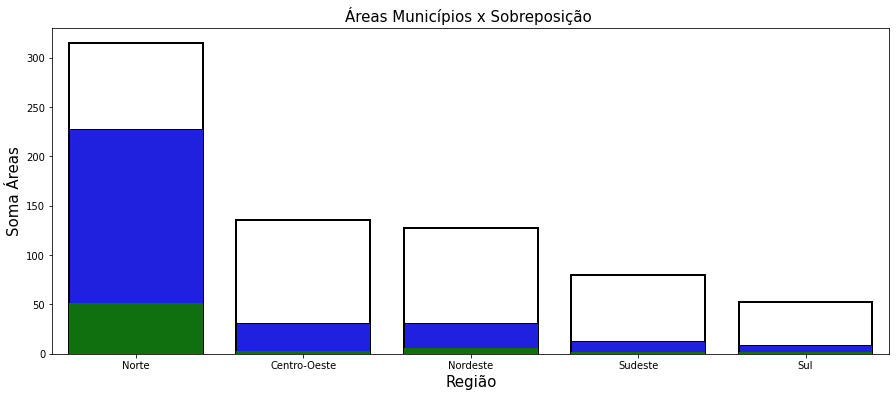

In [54]:
ax = plt.subplots(figsize=(15,6))

ax = sns.barplot( x=data_ibge["REGIAO_MUN"], y=data_ibge["AREA_MUN"], color='w',
                   edgecolor='black', lw=2,
                   ci=None,
                   estimator=sum,
                   order=['Norte','Centro-Oeste','Nordeste','Sudeste','Sul'])


ax = sns.barplot( x=df_mun_uc["REGIAO_MUN"], y=df_mun_uc["AREA_MUN"], color='b',
                   edgecolor='black', lw=1,
                   ci=None,
                   estimator=sum,
                   order=['Norte','Centro-Oeste','Nordeste','Sudeste','Sul'])


ax = sns.barplot( x=df["REGIAO_MUN"], y=df["AREA_SOBREP"], color='g',
                   ci=None,
                   estimator=sum,
                   order=['Norte','Centro-Oeste','Nordeste','Sudeste','Sul'])

plt.title("Áreas Municípios x Sobreposição ", size=15)
plt.xlabel("Região", size=15)
plt.ylabel("Soma Áreas", size=15)

plt.show();

In [ ]:
# Barra Branca = Soma das áreas dos municípios
# Barra Azul = Soma das áreas dos municípios que fazem intersecção com unidades de conservação
# Barra Verde = Soma das áreas de sobreposição